#### Conexiones
#### ==================================================

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import seaborn as sns

### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

# path = getpass.getpass("PATH: ")
# key = getpass.getpass("KEY:  ")
# iv = getpass.getpass("IV:   ")

path = "/home/jupyter/ciphered_connections/000543781.dta"
key = "50bb801fa81378a538654b2b7076b223"
iv = "9029080389AF47F5"


# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 68.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


#### Descarga de tabla 00segment_cortes_v3, se requiere filtrar por segmento
#### ==================================================

In [6]:
# Descarga de tablón
query_decil = '''
    SELECT *                                  
    FROM  `bi-data-science-pilots.DESARROLLO.00segment_cortes_v3`
                                             
    where Decil < 3 and SEGMENTO = '.'
        '''
TABLON_decil_ = conexion_bq.download_table_bq_gcs(query_decil,
    tabla_tmp = table, bucket_name = bucket_name,
    tmp_object = bucket_object)

TABLON_decil_

Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201103153625
Exported DATAMART.gcs_tabla_tiger_20201103153625 to gs://nbamasmovil/gcs_file_tiger_20201103153625_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201103153625` ...

Query ejecutada correctamente


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,DISCOUNT_VALUE_eur,FIN_DTO,LINEAS_TARIFA_ERRONEA,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal,SEG_ISSUE_CALLS,SEG_Wrong_Tariff,SEG_Competitors,SEG_Calidad
0,2020,6,202006,YOIGO,3920493,2012-02-24,2020-04-13,3,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,2020,6,202006,YOIGO,8581043,2018-11-26,2020-01-19,5,0,0,...,0.0,0,1,0,0,0,0,0,0,0
2,2020,6,202006,YOIGO,461029,2008-04-30,2015-04-24,9,0,0,...,20.0,0,0,0,0,0,0,0,0,0
3,2020,6,202006,YOIGO,1347869,2009-09-07,2019-01-11,5,0,0,...,0.0,0,1,0,0,0,0,0,0,0
4,2020,6,202006,YOIGO,8145329,2017-12-27,2020-01-15,3,0,0,...,120.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56861,2020,6,202006,YOIGO,1455920,2009-10-30,2018-04-10,6,0,0,...,20.0,0,0,0,0,0,0,0,1,0
56862,2020,6,202006,YOIGO,2567692,2010-12-29,2020-01-08,4,0,0,...,160.0,0,0,0,0,0,0,0,0,0
56863,2020,6,202006,YOIGO,3302285,2011-08-18,2017-08-07,6,1,0,...,0.0,0,0,0,0,1,0,1,1,0
56864,2020,6,202006,YOIGO,2999083,2011-05-23,2020-03-31,5,0,0,...,0.0,0,0,0,0,1,0,0,0,0


In [7]:
df=TABLON_decil_.copy()
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,DISCOUNT_VALUE_eur,FIN_DTO,LINEAS_TARIFA_ERRONEA,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal,SEG_ISSUE_CALLS,SEG_Wrong_Tariff,SEG_Competitors,SEG_Calidad
0,2020,6,202006,YOIGO,3920493,2012-02-24,2020-04-13,3,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,2020,6,202006,YOIGO,8581043,2018-11-26,2020-01-19,5,0,0,...,0.0,0,1,0,0,0,0,0,0,0
2,2020,6,202006,YOIGO,461029,2008-04-30,2015-04-24,9,0,0,...,20.0,0,0,0,0,0,0,0,0,0
3,2020,6,202006,YOIGO,1347869,2009-09-07,2019-01-11,5,0,0,...,0.0,0,1,0,0,0,0,0,0,0
4,2020,6,202006,YOIGO,8145329,2017-12-27,2020-01-15,3,0,0,...,120.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56861,2020,6,202006,YOIGO,1455920,2009-10-30,2018-04-10,6,0,0,...,20.0,0,0,0,0,0,0,0,1,0
56862,2020,6,202006,YOIGO,2567692,2010-12-29,2020-01-08,4,0,0,...,160.0,0,0,0,0,0,0,0,0,0
56863,2020,6,202006,YOIGO,3302285,2011-08-18,2017-08-07,6,1,0,...,0.0,0,0,0,0,1,0,1,1,0
56864,2020,6,202006,YOIGO,2999083,2011-05-23,2020-03-31,5,0,0,...,0.0,0,0,0,0,1,0,0,0,0


In [8]:
# me quedo con todas las variables numericas
import AYD
cadena=AYD.DS.DSC_Factor(df)
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes

['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'SEGMENTO',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CONSENTSTATUSDETAIL',
 'CONSENTSTATUSNAME',
 'CONSENT_STATUS_DS',
 'CONSENT_STATUS_DETAIL',
 'CUST_PREP_SEGMENT',
 'MAIN_BRAND',
 'CRM_WORK_TYPE']

In [9]:
cadena=AYD.DS.DSC_Factor(df)

# Se identifican variables constantes
# ===================================================
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
# eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
# eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien

# Se eliminan las varibales seleccionadas
# ========================================
df.drop(eliminar_constantes, axis = 'columns',inplace=True) 

# Exclur fechas
# ========================================
fechas=list(cadena[cadena['Variables'].str.contains("DT")]['Variables']) 
fechas.extend(['CUSTOMER_ID'])

df.drop(['CRM_BIRTH_DT',
 'LINE_TYPE_MAIN_PREP_ACT_LAST_DT', 'LINE_TYPE_MAIN_PREP_DEA_LAST_DT',
 'LINE_TYPE_FIXE_POST_ACT_LAST_DT', 'LINE_TYPE_MAIN_POST_ACT_LAST_DT',
 'LINE_TYPE_EXTR_POST_ACT_LAST_DT', 'LINE_TYPE_ADDI_POST_ACT_LAST_DT',
 'LINE_TYPE_FIXE_POST_DEA_LAST_DT', 'LINE_TYPE_MAIN_POST_DEA_LAST_DT',
 'LINE_TYPE_EXTR_POST_DEA_LAST_DT', 'LINE_TYPE_ADDI_POST_DEA_LAST_DT',
 'CUSTOMER_ID'], axis = 'columns',inplace=True) 

numericas=AYD.DS.DSC(df)


#eliminar todas la variables con la palabra busi y soho
eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE|FECHA|DATE" ,case=False)]['Variables']) 
eliminar.extend(['EOP','GDPR_NEVER_CALL','MONTH','Propension','YEAR','Percentil','VERSION','Decil'])  # variables gdpr 

df.drop(eliminar, axis = 'columns', inplace=True)
df_num=df
df_num

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,DISCOUNT_VALUE_eur,FIN_DTO,LINEAS_TARIFA_ERRONEA,PROBLEMAS_TECNICOS,TICKETS_RED,low_signal,SEG_ISSUE_CALLS,SEG_Wrong_Tariff,SEG_Competitors,SEG_Calidad
0,3,0,0,1,7,0,0,1,True,0,...,0.0,0,0,0,0,0,0,0,0,0
1,5,0,0,2,9,0,0,3,True,0,...,0.0,0,1,0,0,0,0,0,0,0
2,9,0,0,1,9,0,0,1,True,0,...,20.0,0,0,0,0,0,0,0,0,0
3,5,0,0,3,8,0,0,5,True,0,...,0.0,0,1,0,0,0,0,0,0,0
4,3,0,0,1,7,0,0,1,True,0,...,120.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56861,6,0,0,1,6,0,0,1,True,0,...,20.0,0,0,0,0,0,0,0,1,0
56862,4,0,0,2,6,0,0,2,True,0,...,160.0,0,0,0,0,0,0,0,0,0
56863,6,1,0,1,6,0,0,1,True,0,...,0.0,0,0,0,0,1,0,1,1,0
56864,5,0,0,1,6,0,0,1,True,0,...,0.0,0,0,0,0,1,0,0,0,0


#### Funcion de busqueda de variables

In [10]:
# num chan tari --> cuantas tarifas distifas distintas en el mes (problemas de proceso)
# pregago --> mirar si tiene alguna variable de prepago 
# max eur gb  ---> desposicionamiento
# precio/gb mirar si sale caro vs precio gb actual (arbol)   actualmete está a 1 euro.
    

In [11]:
# Verificamos que las variables que necesitamos están en el tablón

def verificar(df,var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar(df,"num_chan_tari")

['NUM_CHAN_TARI_ACTI', 'NUM_CHAN_TARI_DEAC']

#### eliminos variables que han definido otros apartados

In [12]:
# Segmento  Issue problemas de proceso
l1=['BILLING_CLAIMS', 'CLAIMS', 'ISSUE_CALL', 'IVR_IS_AFTE',
 'IVR_IS_NIGH', 'IVR_NUM_ACD', 'IVR_NUM_AGEN',  
 'IVR_NUM_AGENT',  'IVR_NUM_CALLS', 'IVR_NUM_CALL_IN', 'IVR_NUM_CALL_TRAN',
 'IVR_NUM_MDTEL', 'IVR_NUM_MOND', 'IVR_NUM_RECA',
 'IVR_NUM_RECA_AGEN', 'IVR_NUM_SAME_ORIGIN', 'IVR_NUM_SECS_TALK_TIME',
 'IVR_NUM_SECS_TOTAL', 'IVR_NUM_SEGM', 'IVR_NUM_YDILO', 'Incidencias_High_Priority',
 'Jiras_Reclamacion_Movil', 'MAX_IVR_NUM_AGEN', 'MAX_IVR_NUM_SECS_TALK_TIME',
 'MAX_IVR_NUM_SECS_TOTAL', 'MAX_IVR_NUM_SEGM', 'MOSAIC_NUM_COMMS_CURR',
 'MOSAIC_NUM_COMM_DEPT_ATC_CURR', 'MOSAIC_NUM_COMM_DEPT_FAULT_CURR', 'MOSAIC_NUM_COMM_WITH_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_CUSTOMER_CURR', 'MOSAIC_NUM_COMM_WP_GRP_NON_TECH_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_TECH_CURR', 'MOSAIC_NUM_COMM_WP_MOB_FAULT_CURR', 'NUM_LLAMADAS_PROCESS',
 'TOTAL_BLUE_TICKETS',  'tiempo_hr_resolucion_incidencia', 'tiempo_hr_resolucion_reclamacion', 'total_jiras_cc']

In [13]:
#Segmento Wrong Tarrif
l2=['LINEAS_TARIFA_ERRONEA', 'Lineas_Exceso', 'lineas_BONO_PAGADO',
'flag_BONO','LM2_LINEAS_BONO_PAGADO', 'LM3_LINEAS_BONO_PAGADO',
 'FLAG_useless_line', 'Lineas_Con_Bono_Sin_Uso', 'lineas_GB_Exceso',
'LM2_LINEAS_GB_EXCESO', 'ISSUE_CALL', 'lineas_1GB_Exceso',
 'lineas_gb_exceso_m1', 'EUR_BONO_PAGADO_C', 'Fact_BONO',
 'total_amount_wo_tax_data', 'MoONLY_am_wotax_data', 'LM3_LINEAS_GB_EXCESO',
 'lineas_gb_exceso_m2', 'kpi_tax','Fact_Total_tax', 'Fact_Total_Wotax',
 'total_jiras_cc', 'lineas_5GB_Exceso', 'FIN_DTO',
 'NUM_DISC_NEXT_2_MONTHS_DEAC', 'NUM_DISC_PURE_NEXT_2_MONTHS_DEAC',
 'NUM_SELL_TYPE_NEWS_ACTI', 'NUM_LINE_TYPE_MAIN_POST_ACTI', 'NUM_SELL_TYPE_TECH_MOBI_ACTI',
 'NUM_SELL_TYPE_ACTI', 'NUM_LLAMADAS_WRONG_TARIFF', 'ISSUE_CALL',
'IVR_NUM_HOUR_16', 'MAX_IVR_NUM_SEGM', 'MOSAIC_NUM_COMM_DEPT_FAULT_CURR',
 'total_jiras_cc', 'IVR_NUM_YDILO',  'NUM_SERV_AGILETV_PLUS_CURR', 'NUM_SERV_AGILETV_CURR',
'MIN_LLAMADAS_JAZZTEL_IN', 'MAX_IVR_NUM_SECS_TOTAL', 'MOSAIC_NUM_COMM_DEPT_ATC_CURR',
 'MOSAIC_NUM_COMMS_CURR']

In [14]:
#Segmento Competitors
l3=['NUM_LLAMADAS_COMPETENCIA_OUT', 'MIN_LLAMADAS_COMPETENCIA_OUT', 'NUM_LLAMADAS_TELEFONICA_OUT', 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT', 'NUM_LLAMADAS_R_CABLE_OUT', 'NUM_LLAMADAS_VODAFONE_OUT', 'MIN_LLAMADAS_VODAFONE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT', 'MIN_LLAMADAS_R_CABLE_OUT', 'NUM_LLAMADAS_TELEFONICA_IN', 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT', 'FRIENDS_IS_CHURN_YOI', 'FRIENDS_IS_CHURN_GMM', 'NUM_FRIENDS_BRAND_VOD',
 'cust_min_days_between_mob_port', 'cust_min_months_between_mob_port', 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port', 'cust_n_mob_port', 'cust_n_mob_recent_port', 'cust_n_mm_group_mob_port',
 'NUM_FRIENDS_BRAND_UNKN', 'NUM_FRIENDS_BRAND_TME', 'NUM_FRIENDS_BRAND_VOD', 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG', 'NUM_FRIENDS_BRAND_YOI', 'NUM_FRIENDS_BRAND_GMM', 'NUM_FRIENDS',
 'cust_days_since_last_mob_port', 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port', 'tiempo_hr_resolucion_reclamacion', 'tiempo_hr_resolucion_incidencia']


In [15]:
#Segmento calidad
l4=['NUM_THR_QOE_MOBI_1', 'NUM_MONTH_BAD_THR_QOE_MOBI_3M', 'NUM_MONTH_BAD_THR_QOE_MOBI_12M', 'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
 'IS_SAME_3M_AVG_KPI_QOE_MOBI', 'PERC_GB_3G_ALLN_CURR', 'IS_SAME_1M_AVG_KPI_QOE_MOBI', 'PERC_GB_3G_NATR_CURR', 'low_signal',
 'NUM_GB_3G_RAAS_CURR', 'NUM_GB_3G_NATR_CURR', 'PERC_GB_NATR_ALLN_CURR', 'PERC_GB_NATR_CURR', 'NUM_GB_3G_CURR',
 'PERC_GB_3G_OWNN_CURR', 'PERC_SESS_NATR_ALLN_CURR', 'PERC_SESS_NATR_CURR', 'NUM_NETW_TMEN_CURR',
 'NUM_GB_2G_NATR_CURR', 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'NUM_GB_2G_CURR', 'IS_SAME_1M_AVG_THR_QOE_MOBI',
 'AVG_THR_QOE_MOBI', 'AVG_KPI_QOE_MOBI', 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'NUM_THR_QOE_MOBI_5', 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'IS_SAME_3M_AVG_THR_QOE_MOBI', 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI', 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI', 'PERC_GB_4G_OWNN_CURR',
 'NUM_FRIENDS', 'NUM_FRIENDS_BRAND_UNKN', 'AVG_KPI_PERC_CSS_MOBI', 'PERC_GB_4G_NATR_CURR', 'PERC_GB_4G_ALLN_CURR',
 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI', 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI', 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI', 'low_signal',
 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'AVG_THR_QOE_MOBI', 'AVG_KPI_QOE_MOBI',
 'AVG_THR_QOE_MOBI', 'AVG_KPI_QOE_MOBI', 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'NUM_THR_QOE_MOBI_5', 'AVG_DL_PEAK_THR_KBPS_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'IS_SAME_3M_AVG_THR_QOE_MOBI', 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI', 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI', 'PERC_GB_4G_OWNN_CURR',
 'NUM_FRIENDS', 'NUM_FRIENDS_BRAND_UNKN', 'AVG_KPI_PERC_CSS_MOBI','PERC_GB_4G_NATR_CURR', 'PERC_GB_4G_ALLN_CURR', 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',
 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI', 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI', 'low_signal', 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI',
 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'AVG_THR_QOE_MOBI', 'AVG_KPI_QOE_MOBI', 'AVG_THR_QOE_MOBI', 'AVG_KPI_QOE_MOBI',
 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'NUM_THR_QOE_MOBI_5', 'AVG_DL_PEAK_THR_KBPS_MOBI', 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'IS_SAME_3M_AVG_THR_QOE_MOBI',
 'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI', 'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI', 'PERC_GB_4G_OWNN_CURR', 'NUM_FRIENDS', 'NUM_FRIENDS_BRAND_UNKN',
 'AVG_KPI_PERC_CSS_MOBI', 'PERC_GB_4G_NATR_CURR', 'PERC_GB_4G_ALLN_CURR', 'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI', 'IS_DETERIORED_1M_AVG_THR_QOE_MOBI', 'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
 'low_signal', 'NUM_LINE_KPI_QOE_MOBI', 'NUM_LINE_THR_QOE_MOBI', 'IS_SAME_1M_AVG_THR_QOE_MOBI', 'AVG_THR_QOE_MOBI',
 'AVG_KPI_QOE_MOBI', 'PROBLEMAS_TECNICOS', 'total_jiras_cc']

In [16]:
l1.extend(l2)
l1.extend(l3)
l1.extend(l4)

In [192]:
len(l1) 

219

In [193]:
# def eliminar_repetidos(lista):
#     nueva=[]
#     for elemento in lista:
#         if not elemento in nueva:
#             nueva.append(elemento)
#     return nueva
# eliminar_repetidos(l1)

In [17]:
verificar(df_num,"fug")

['fuga_real']

#### eliminamos lista de variables de df numerico

In [18]:
df_num.drop(l1, axis = 'columns', inplace=True)
df_num

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,fuga_real,GB_EXCESO,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,TICKETS_RED,SEG_ISSUE_CALLS,SEG_Wrong_Tariff,SEG_Competitors,SEG_Calidad
0,3,0,0,1,7,0,0,1,True,0,...,0,0.000000,0,0,0.0,0,0,0,0,0
1,5,0,0,2,9,0,0,3,True,0,...,0,0.000000,0,0,0.0,0,0,0,0,0
2,9,0,0,1,9,0,0,1,True,0,...,0,0.000000,0,1,20.0,0,0,0,0,0
3,5,0,0,3,8,0,0,5,True,0,...,0,0.000000,0,0,0.0,0,0,0,0,0
4,3,0,0,1,7,0,0,1,True,0,...,0,0.000000,0,2,120.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56861,6,0,0,1,6,0,0,1,True,0,...,0,-0.842584,0,1,20.0,0,0,0,1,0
56862,4,0,0,2,6,0,0,2,True,0,...,0,0.000000,0,4,160.0,0,0,0,0,0
56863,6,1,0,1,6,0,0,1,True,0,...,1,0.000000,0,0,0.0,0,0,1,1,0
56864,5,0,0,1,6,0,0,1,True,0,...,0,0.000000,0,0,0.0,0,0,0,0,0


In [19]:
verificar(df_num,"fug")

['fuga_real']

#### CORRELACION VS FUGA

In [20]:
# ===============================================
DF_muestra=df_num.head(10000)
#DF_COR=df
DF_muestra

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,fuga_real,GB_EXCESO,Lineas_Poco_Uso,total_telefonos,DISCOUNT_VALUE_eur,TICKETS_RED,SEG_ISSUE_CALLS,SEG_Wrong_Tariff,SEG_Competitors,SEG_Calidad
0,3,0,0,1,7,0,0,1,True,0,...,0,0.0,0,0,0.0,0,0,0,0,0
1,5,0,0,2,9,0,0,3,True,0,...,0,0.0,0,0,0.0,0,0,0,0,0
2,9,0,0,1,9,0,0,1,True,0,...,0,0.0,0,1,20.0,0,0,0,0,0
3,5,0,0,3,8,0,0,5,True,0,...,0,0.0,0,0,0.0,0,0,0,0,0
4,3,0,0,1,7,0,0,1,True,0,...,0,0.0,0,2,120.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,1,0,0,1,True,0,...,0,0.0,0,0,0.0,0,0,0,0,0
9996,1,0,0,1,1,0,0,1,True,0,...,0,0.0,0,1,2.0,0,0,0,0,0
9997,1,0,0,2,1,0,0,3,True,0,...,0,0.0,0,1,20.0,0,0,0,0,0
9998,1,1,0,1,1,0,0,1,True,0,...,0,0.0,0,0,0.0,0,0,0,0,0


In [21]:
corr = DF_muestra.corr()
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
cor_var

,fuga_real
fuga_real,1.000000
PERC_UNPAID_LAST_3M_MONTH,0.165911
IS_CUST_UNPAID_LAST_3M_MONTH,0.152962
MAX_NUM_FACTURA_IMPAGADA,0.112576
NUM_LINE_TYPE_EXTR_CURR,0.087629
...,...
NUM_DISC_PURE_NEXT_2_MONTHS_ACTI,NaN
Fact_BONO_discount,NaN
Fact_LOYALTY_discount,NaN
Fact_QUOTA_discount,NaN


# IMPAGO

In [23]:
# Impago --> PERC_UNPAID_LAST_3M_MONTH 
# identifico las variables de impago

cor_var= corr[['PERC_UNPAID_LAST_3M_MONTH']].sort_values(by = 'PERC_UNPAID_LAST_3M_MONTH',ascending = False)
SEG_PROCESS_ISSUE= cor_var[cor_var['PERC_UNPAID_LAST_3M_MONTH']>=0.2]
SEG_PROCESS_ISSUE

,PERC_UNPAID_LAST_3M_MONTH
PERC_UNPAID_LAST_3M_MONTH,1.000000
IS_CUST_UNPAID_LAST_3M_MONTH,0.929481
MAX_NUM_FACTURA_IMPAGADA,0.805706
SUM_TOTAL_TAXES_UNPAID_LAST_3M_MONTH,0.738360
SUM_TOTAL_NO_TAXES_UNPAID_LAST_3M_MONTH,0.735710
PERC_UNPAID_LAST_6M_MONTH,0.734508
MAX_CICLO_IMPAGO,0.619391
IS_CUST_UNPAID_LAST_6M_MONTH,0.602494
SUM_TOTAL_TAXES_UNPAID_LAST_6M_MONTH,0.591385
SUM_TOTAL_NO_TAXES_UNPAID_LAST_6M_MONTH,0.587555


In [ ]:
impago=['PERC_UNPAID_LAST_3M_MONTH','IS_CUST_UNPAID_LAST_3M_MONTH','MAX_NUM_FACTURA_IMPAGADA','SUM_TOTAL_TAXES_UNPAID_LAST_3M_MONTH','SUM_TOTAL_NO_TAXES_UNPAID_LAST_3M_MONTH',
'PERC_UNPAID_LAST_6M_MONTH','SUM_TOTAL_TAXES_UNPAID_LAST_6M_MONTH','SUM_TOTAL_NO_TAXES_UNPAID_LAST_6M_MONTH','MAX_CICLO_IMPAGO','IS_CUST_UNPAID_LAST_6M_MONTH',
'PERC_RECO_LAST_6M_MONTH','PERC_RECO_LAST_3M_MONTH','NUM_DISC_TOTA']

In [ ]:
# df_num.drop(impago, axis = 'columns', inplace=True)
# df_num

In [216]:
X=df[
  ['PERC_UNPAID_LAST_3M_MONTH','IS_CUST_UNPAID_LAST_3M_MONTH',
   
   'MAX_NUM_FACTURA_IMPAGADA',
   #'SUM_TOTAL_TAXES_UNPAID_LAST_3M_MONTH','SUM_TOTAL_NO_TAXES_UNPAID_LAST_3M_MONTH',
'PERC_UNPAID_LAST_6M_MONTH',
   #'SUM_TOTAL_TAXES_UNPAID_LAST_6M_MONTH','SUM_TOTAL_NO_TAXES_UNPAID_LAST_6M_MONTH',
   'MAX_CICLO_IMPAGO',
   'IS_CUST_UNPAID_LAST_6M_MONTH',
'PERC_RECO_LAST_6M_MONTH','PERC_RECO_LAST_3M_MONTH','NUM_DISC_TOTA']]


Y=df[['fuga_real']].astype(str)

In [217]:
# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)

from sklearn.tree import DecisionTreeClassifier

# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=2500) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


import graphviz 
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import numpy as np

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  
                                proportion = True,
                         special_characters=True)

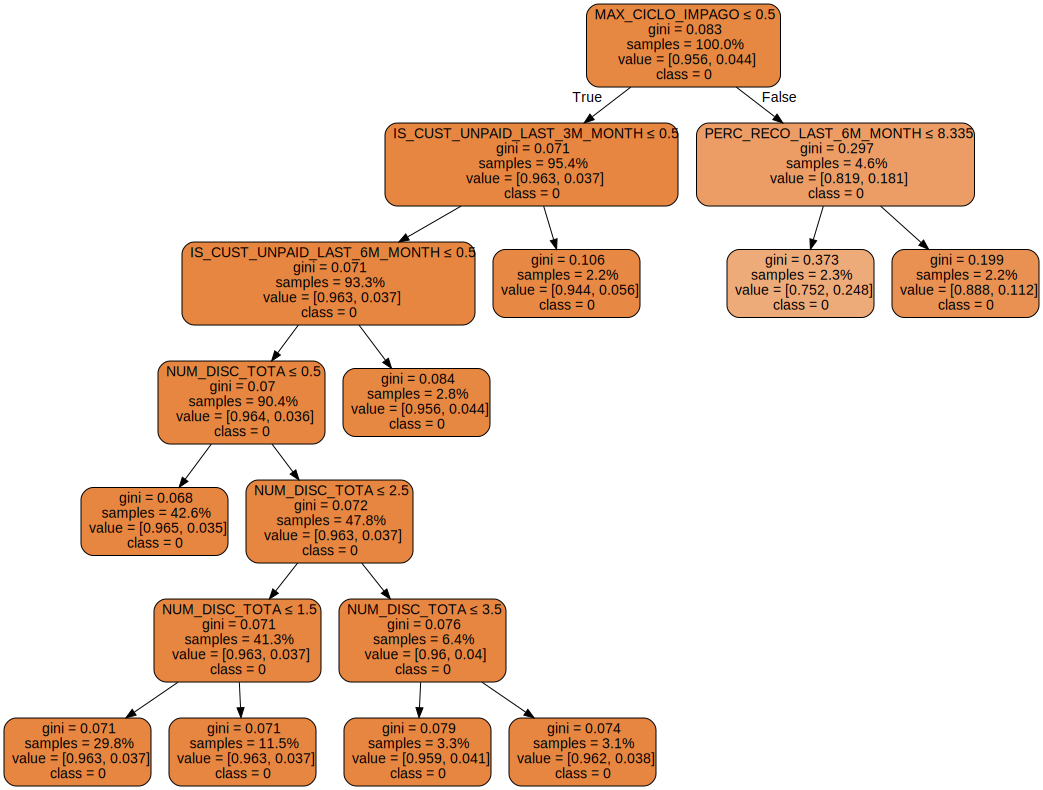

In [218]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
# regla --> MAX_CICLO_IMPAGO> 0 | IS_CUST_UNPAID_LAST_6M_MONTH | IS_CUST_UNPAID_LAST_3M_MONTH

# Descuentos Y CON MAS DE UNA LINEA, MIRAR SI ESTÁN EN PROCESO DE DESACTIVACION DE PAQUETE 3P



In [220]:

cor_var= corr[['NUM_DISC_TOTA']].sort_values(by = 'NUM_DISC_TOTA',ascending = False)
SEG_PROCESS_ISSUE= cor_var[cor_var['NUM_DISC_TOTA']>=0.3]
SEG_PROCESS_ISSUE

,NUM_DISC_TOTA
NUM_DISC_TOTA,1.000000
NUM_DISC_PURE_TOTA,0.662239
total_telefonos,0.521025
DISCOUNT_VALUE_eur,0.467954
NUM_EURO_DISC_TOTA,0.434719
IS_CUST_UNPAID_LAST_6M_MONTH,0.407848
PERC_RECO_LAST_6M_MONTH,0.373149
PERC_UNPAID_LAST_6M_MONTH,0.366554
NUM_DISC_PURE_DEAC,0.365811
TICKETS_PROCESS,0.363362


In [ ]:
['NUM_DISC_TOTA',
'NUM_DISC_PURE_TOTA',
'total_telefonos',
'DISCOUNT_VALUE_eur',
'NUM_EURO_DISC_TOTA',
'IS_CUST_UNPAID_LAST_6M_MONTH',
'PERC_RECO_LAST_6M_MONTH',
'PERC_UNPAID_LAST_6M_MONTH',
'NUM_DISC_PURE_DEAC',
'TICKETS_PROCESS']

In [237]:
X=df[
['NUM_DISC_TOTA',
#'NUM_DISC_PURE_TOTA',
'total_telefonos',
#'DISCOUNT_VALUE_eur',
#'NUM_EURO_DISC_TOTA',
#'IS_CUST_UNPAID_LAST_6M_MONTH',
#'PERC_RECO_LAST_6M_MONTH',
#'PERC_UNPAID_LAST_6M_MONTH',
'NUM_DISC_PURE_DEAC',
'TICKETS_PROCESS']]


Y=df[['fuga_real']].astype(str)

In [238]:
# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)

from sklearn.tree import DecisionTreeClassifier

# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=2500) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


import graphviz 
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import numpy as np

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  
                                proportion = True,
                         special_characters=True)

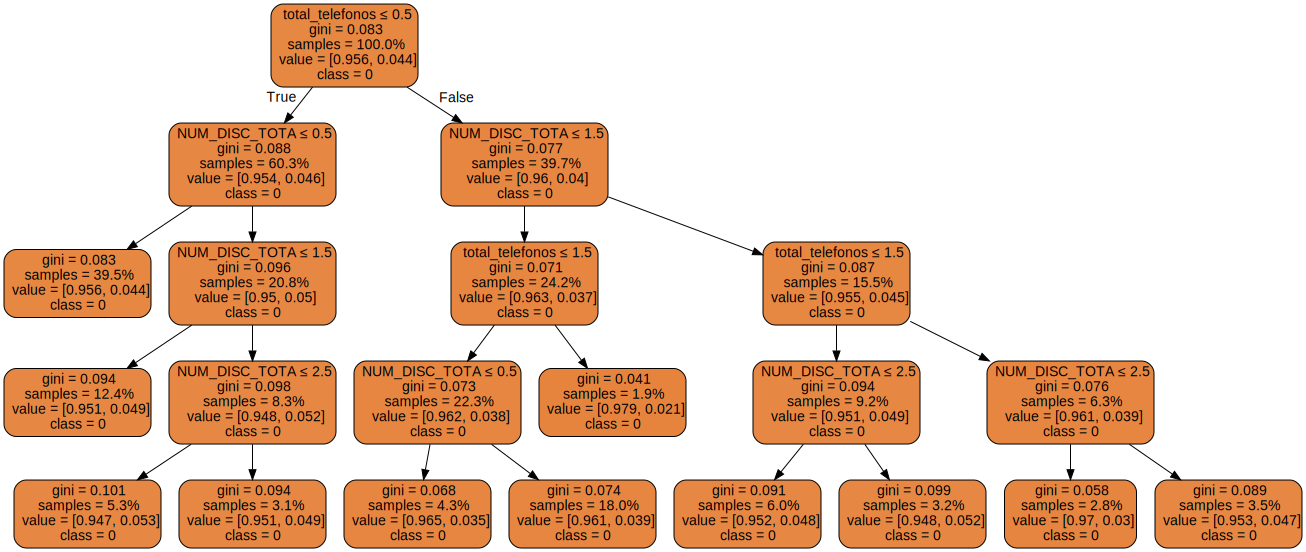

In [239]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

# ANEXAMOS MÁS INFORMACION identificacion nuevo bloque 2

In [ ]:
corr = df_num.corr()
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
cor_var

In [240]:
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
SEG_PROCESS_ISSUE= cor_var[cor_var['fuga_real']>=0.04]
SEG_PROCESS_ISSUE

,fuga_real
fuga_real,1.000000
PERC_UNPAID_LAST_3M_MONTH,0.167312
IS_CUST_UNPAID_LAST_3M_MONTH,0.157470
MAX_NUM_FACTURA_IMPAGADA,0.103261
SUM_TOTAL_TAXES_UNPAID_LAST_3M_MONTH,0.101617
SUM_TOTAL_NO_TAXES_UNPAID_LAST_3M_MONTH,0.100025
NUM_LINE_TYPE_EXTR_CURR,0.093042
NUM_LINE_TYPE_EXTR_POST_CURR,0.093042
DELTA_CONSUMO_1M,0.058631
MAX_CICLO_IMPAGO,0.057272


In [179]:
 #los que están en proceso de desactivacion de 3P

cor_var= corr[['NUM_LINE_TYPE_EXTR_POST_CURR']].sort_values(by = 'NUM_LINE_TYPE_EXTR_POST_CURR',ascending = False)
SEG_PROCESS_ISSUE= cor_var[cor_var['NUM_LINE_TYPE_EXTR_POST_CURR']>=0.2]
SEG_PROCESS_ISSUE

,NUM_LINE_TYPE_EXTR_POST_CURR
NUM_LINE_TYPE_EXTR_POST_CURR,1.000000
NUM_LINE_TYPE_EXTR_CURR,1.000000
NUM_DAYS_LINE_TYPE_EXTR_POST_ACT,0.338540
NUM_MONTHS_LINE_TYPE_EXTR_POST_ACT,0.327599
NUM_LINE_TYPE_EXTR_POST_ACTI,0.285681
NUM_LINE_TYPE_EXTR_ACTI,0.285681
MoBrand_calls,0.258041
MoBrand_min_calls,0.226619
IS_CUST_TECH_SPEE_MORE_100_MB_TOTA,0.205957
IS_CUST_TECH_SPEE_MORE_100_MB_ACTI,0.205957


In [246]:
X=df[
['NUM_DISC_TOTA',
#'NUM_DISC_PURE_TOTA',
'total_telefonos',
#'DISCOUNT_VALUE_eur',
#'NUM_EURO_DISC_TOTA',
#'IS_CUST_UNPAID_LAST_6M_MONTH',
#'PERC_RECO_LAST_6M_MONTH',
#'PERC_UNPAID_LAST_6M_MONTH',
'NUM_DISC_PURE_DEAC',
# 'TICKETS_PROCESS',
'NUM_LINE_TYPE_EXTR_POST_CURR',
'NUM_LINE_TYPE_EXTR_CURR',
# 'NUM_DAYS_LINE_TYPE_EXTR_POST_ACT',
'NUM_MONTHS_LINE_TYPE_EXTR_POST_ACT',
'NUM_LINE_TYPE_EXTR_POST_ACTI',
'NUM_LINE_TYPE_EXTR_ACTI'
]]


Y=df[['fuga_real']].astype(str)

In [247]:
# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)

from sklearn.tree import DecisionTreeClassifier

# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=3000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


import graphviz 
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import numpy as np

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  
                                proportion = True,
                         special_characters=True)

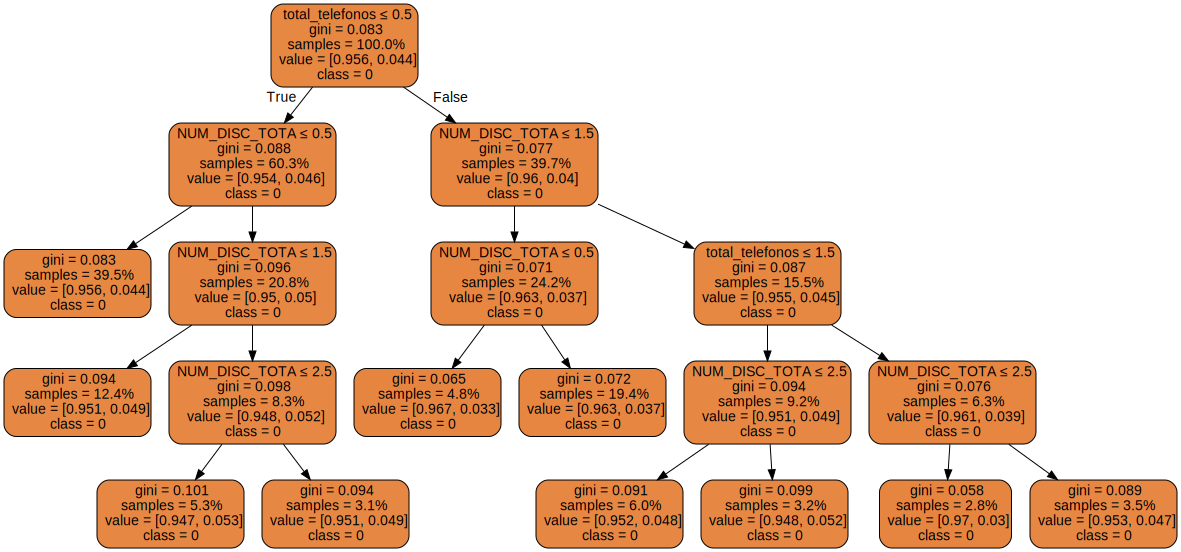

In [248]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
# REVISAR FIN DESCUESNTO
total_telefonos > 0 & NUM_DISC_TOTA > 1 